In [44]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from datetime import date
import seaborn as sns
from pydataset import data
from env import host, user, password
import os
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
# Load the tips dataset from either pydataset or seaborn.

tips = data('tips')

In [3]:
tips

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
240,29.03,5.92,Male,No,Sat,Dinner,3
241,27.18,2.00,Female,Yes,Sat,Dinner,2
242,22.67,2.00,Male,Yes,Sat,Dinner,2
243,17.82,1.75,Male,No,Sat,Dinner,2


In [4]:
# Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill.

from statsmodels.formula.api import ols

model = ols('tip ~ total_bill', data=tips).fit()
predictions = model.predict(tips.total_bill)

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_bill'>

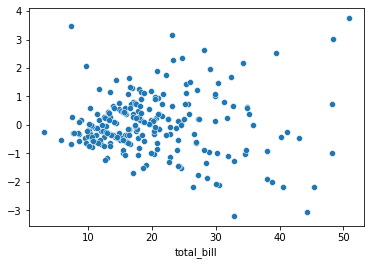

In [39]:
# Plot the residuals for the linear regression model that you made.

residuals = tips.tip - predictions
sns.scatterplot(tips.total_bill, residuals)

In [6]:
tips['yhat'] = predictions

In [7]:
tips['residual'] = tips['tip'] - predictions

In [8]:
tips['baseline'] = tips['tip'].mean()

In [9]:
tips['residual_baseline'] = tips['baseline'] - tips['tip']

In [10]:
tips['residual_baseline^2'] = tips.residual_baseline ** 2

In [11]:
tips['residual^2'] = tips.residual ** 2

In [12]:
tips

,total_bill,tip,sex,smoker,day,time,size,yhat,residual,baseline,residual_baseline,residual_baseline^2,residual^2
1,16.99,1.01,Female,No,Sun,Dinner,2,2.704636,-1.694636,2.998279,1.988279,3.953252,2.871792
2,10.34,1.66,Male,No,Sun,Dinner,3,2.006223,-0.346223,2.998279,1.338279,1.790990,0.119870
3,21.01,3.50,Male,No,Sun,Dinner,3,3.126835,0.373165,2.998279,-0.501721,0.251724,0.139252
4,23.68,3.31,Male,No,Sun,Dinner,2,3.407250,-0.097250,2.998279,-0.311721,0.097170,0.009458
5,24.59,3.61,Female,No,Sun,Dinner,4,3.502822,0.107178,2.998279,-0.611721,0.374203,0.011487
...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,29.03,5.92,Male,No,Sat,Dinner,3,3.969131,1.950869,2.998279,-2.921721,8.536455,3.805888
241,27.18,2.00,Female,Yes,Sat,Dinner,2,3.774836,-1.774836,2.998279,0.998279,0.996560,3.150043
242,22.67,2.00,Male,Yes,Sat,Dinner,2,3.301175,-1.301175,2.998279,0.998279,0.996560,1.693057
243,17.82,1.75,Male,No,Sat,Dinner,2,2.791807,-1.041807,2.998279,1.248279,1.558200,1.085361


In [13]:
# Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, 
# and root mean squared error for your model.

SSE = sum(tips['residual^2'])
SSE_baseline = sum(tips['residual_baseline^2'])

print("SSE = ", SSE)

SSE =  252.78874385077597


In [14]:
MSE = SSE/len(tips)
MSE_baseline = SSE_baseline/len(tips)

print("MSE = ", MSE)

MSE =  1.0360194420113769


In [15]:
from math import sqrt
RMSE = sqrt(MSE)
RMSE_baseline = sqrt(MSE_baseline)

print("RMSE = ", RMSE)

RMSE =  1.0178504025697377


In [16]:
df_eval = pd.DataFrame(np.array(['SSE','MSE','RMSE']), columns=['metric'])

df_eval['model_error'] = np.array([SSE, MSE, RMSE])

In [17]:
ESS = sum((tips.yhat - tips.tip.mean())**2)
SSE = df_eval[df_eval.metric=='SSE']['model_error']
TSS = ESS + SSE
print("ESS = ", ESS)
print("SSE = ", SSE[0])
print("TSS = ", TSS[0])

ESS =  212.4237331984042
SSE =  252.78874385077597
TSS =  465.21247704918017


In [20]:
# Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model 

print("SSE - baseline = ", SSE_baseline)
print("MSE baseline = ", MSE_baseline)
print("RMSE baseline = ", RMSE_baseline)
df_baseline_eval = pd.DataFrame(np.array(['SSE_baseline','MSE_baseline','RMSE_baseline']), columns=['metric'])
df_baseline_eval['model_error'] = np.array([SSE_baseline, MSE_baseline, RMSE_baseline])
ESS_baseline = sum((tips.baseline - tips.tip.mean())**2)
SSE_baseline = df_baseline_eval[df_baseline_eval.metric=='SSE_baseline']['model_error']
TSS_baseline = ESS_baseline + SSE_baseline
print("ESS_baseline = ", ESS_baseline)
print("SSE_baseline = ", SSE_baseline[0])
print("TSS_baseline = ", TSS_baseline[0])

SSE - baseline =  465.21247704918085
MSE baseline =  1.9066085124966428
RMSE baseline =  1.3807999538298958
ESS_baseline =  0.0
SSE_baseline =  465.21247704918085
TSS_baseline =  465.21247704918085


In [27]:
# Write python code that compares the sum of squared errors for your model against the sum of squared errors 
# for the baseline model and outputs whether or not your model performs better than the baseline model.

SSE = sum(tips['residual^2'])
SSE_baseline = sum(tips['residual_baseline^2'])
print("SSE =", round(SSE, 2))
print("SSE_baseline =", round(SSE_baseline, 2))
if SSE > SSE_baseline:
    print("The baseline has performed better than the model")
else:
    print("The model has outperformed the baseline")

SSE = 252.79
SSE_baseline = 465.21
The model has outperformed the baseline


In [31]:
# What is the amount of variance explained in your model?

from sklearn.metrics import explained_variance_score
evs = explained_variance_score(tips.tip, tips.yhat)
print('Explained Variance = ', round(evs,3))

Explained Variance =  0.457


In [33]:
# Is your model significantly better than the baseline model?
# Variance for the baseline is going to be 0, as it is the mean of the tips received.

evs_base = explained_variance_score(tips.tip, tips.baseline)
print('Explained Variance for base = ', round(evs_base,3))

Explained Variance for base =  0.0


In [42]:
r2 = ESS/TSS
r2 = ols_model.rsquared

NameError: name 'ols_model' is not defined